# 6.4 Machine Learning Citibike


This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

Hypothesis: As age increases, ride duration per rental decreases

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\Chris Arnold\Documents\Citibike Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_cleaned.csv'))

## 02. Data cleaning

There should not neet be be any cleaning for this analysis. I am running trip duration against age. I may have to remove outliers.

In [5]:
df.columns

Index(['Unnamed: 0', 'state', 'trip_id', 'bike_id', 'weekday', 'weekday_index',
       'start_hour', 'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'start_coordinate',
       'end_time', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'end_coordinate',
       'trip_duration', 'subscriber', 'birth_year', 'age', 'gender'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,state,trip_id,bike_id,weekday,weekday_index,start_hour,start_time,start_station_id,start_station_name,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,end_coordinate,trip_duration,subscriber,birth_year,age,gender
0,0,New York,LnQzQk,16013,Mon,1,18,9/9/2013 18:18,523,W 38 St & 8 Ave,...,334,W 20 St & 7 Ave,40.742388,-73.997262,"40.74238787, -73.99726235",993,Subscriber,1968,45,Female
1,1,New York,IL9boN,15230,Thu,4,18,9/12/2013 18:38,257,Lispenard St & Broadway,...,236,St Marks Pl & 2 Ave,40.728419,-73.987140,"40.7284186, -73.98713956",581,Subscriber,1983,30,Male
2,2,New York,46clGB,17942,Wed,3,19,9/18/2013 19:44,479,9 Ave & W 45 St,...,513,W 56 St & 10 Ave,40.768254,-73.988639,"40.768254, -73.988639",361,Subscriber,1989,24,Male
3,3,New York,v7vdFt,19683,Sat,6,11,9/28/2013 11:54,527,E 33 St & 1 Ave,...,441,E 52 St & 2 Ave,40.756014,-73.967416,"40.756014, -73.967416",561,Subscriber,1988,25,Female
4,4,New York,VGBsb5,18024,Sat,6,18,9/7/2013 18:08,521,8 Ave & W 31 St,...,476,E 31 St & 3 Ave,40.743943,-73.979661,"40.74394314, -73.97966069",2296,Non-Subscriber,0,0,Unknown
5,5,New York,HbKJBz,14581,Fri,5,22,9/27/2013 22:01,293,Lafayette St & E 8 St,...,432,E 7 St & Avenue A,40.726218,-73.983799,"40.72621788, -73.98379855",427,Subscriber,1986,27,Female
6,6,New York,aOKk3s,15022,Sun,7,13,9/29/2013 13:13,380,W 4 St & 7 Ave S,...,317,E 6 St & Avenue B,40.724537,-73.981854,"40.72453734, -73.98185424",639,Subscriber,1994,19,Male
7,7,New York,kpcluW,16253,Sat,6,10,9/21/2013 10:48,346,Bank St & Hudson St,...,212,W 16 St & The High Line,40.743349,-74.006818,"40.74334935, -74.00681753",263,Subscriber,1969,44,Male
8,8,New York,GC8mJC,16745,Fri,5,12,9/20/2013 12:29,510,W 51 St & 6 Ave,...,422,W 59 St & 10 Ave,40.770513,-73.988038,"40.770513, -73.988038",666,Subscriber,1993,20,Male
9,9,New York,qyXq7X,19556,Tue,2,16,9/3/2013 16:56,446,W 24 St & 7 Ave,...,342,Columbia St & Rivington St,40.717400,-73.980166,"40.71739973, -73.98016555",582,Subscriber,1983,30,Male


In [7]:
df.shape

(50000, 24)

Missing values check

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                 0
state                      0
trip_id                    0
bike_id                    0
weekday                    0
weekday_index              0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
start_coordinate           0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
end_coordinate             0
trip_duration              0
subscriber                 0
birth_year                 0
age                        0
gender                     0
dtype: int64

Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(50000,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

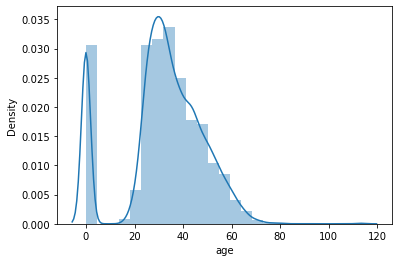

In [11]:
sns.distplot(df['age'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['age'].mean() # Check the mean

32.1558

In [13]:
df['age'].median() # Check the median

33.0

In [14]:
df['age'].max() # Check the max

114

that age seems unlikely for the max, however I did do a quick search online and found that the oldest living person in the united states is actually over 115 years old. Is it likely that they are riding a heavy rental bike in New york city? Probably not, but it is in theory not outside of possiblilty.

## 3. Data prep for regression analysis

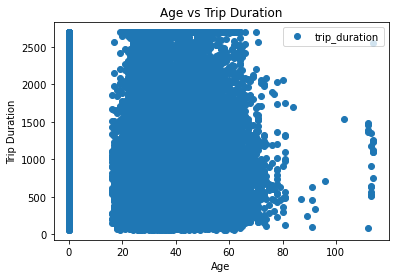

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Trip Duration')  
plt.xlabel('Age')  
plt.ylabel('Trip Duration')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [17]:
X

array([[45],
       [30],
       [24],
       ...,
       [52],
       [ 0],
       [33]], dtype=int64)

In [19]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]], dtype=int64)

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

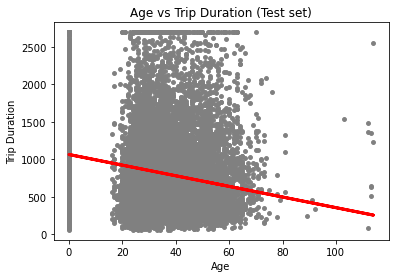

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Trip Duration (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.0913494]]
Mean squared error:  318137.7229518499
R2 score:  0.04476875881058762


In [27]:
y_predicted

array([[ 654.90376772],
       [ 711.63456293],
       [1066.20203294],
       ...,
       [ 818.00480393],
       [1066.20203294],
       [ 697.45186412]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,360,654.903768
1,1626,711.634563
2,1137,1066.202033
3,758,1066.202033
4,306,732.908611
5,670,839.278852
6,330,846.370202
7,1105,1066.202033
8,213,896.009647
9,259,711.634563


Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.0913494]]
Mean squared error:  313657.65849431825
R2 score:  0.041927960946272935


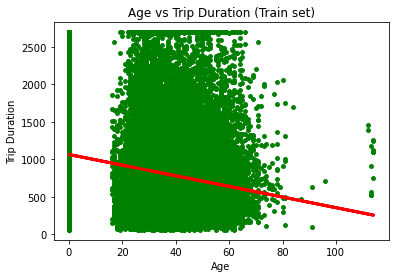

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Trip Duration (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Trip Duration')
plot_test.show()

Thoughts
In general is is pretty easy to see that as the age goes up, that the amount of time that the rental lasts is decreasing. The scatterplot definitely shows that the trip duration does not behave linearly so a linear regression is not necessarily the best way to desribe this situation but it does give a rough trend line. Having taken many statistics classes this is not a line of best fit that would be appropriate (nor would I be comfortable presenting this as a good representation even with outliers removed) for a presentation to a company.
Upon further investigation I came across this article
https://machinelearningmastery.com/curve-fitting-with-python/
This states my suspicions that this needed to be more of a polynomial regression (it appears the average of trip duration would be some form of ax^2 + bx +c to my eye), and as the article states "Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs." So while it was good to go through the process, this would not be the optimal representation to present as how these two variables behave together.

I will note that the test set and the acutal set showed extremely similar results so for the purposes of this exercise. In relation to bias, I would say that there is no bias displayed at all in relation to collection or display.